# CIVL 547 - Assignment 6
### 2 layer flow over topography

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
q1 = q2 = 101 #cm2/s
g_ = 7.9 #cm/s2
Y = 51.4 #cm
hm = 15 #cm
L = 4*hm

#different x for before bump, over bump, and after bump - append together after h is calculated
# x1 = np.linspace(-L*(math.pi/2)-100,-L*(math.pi/2)-1, 101)
# x2 = np.linspace(-L*(math.pi/2),L*(math.pi/2), 101)
# x3 = np.linspace(L*(math.pi/2)+1,L*(math.pi/2)+100, 101)
x = np.linspace(-L*(math.pi/2),L*(math.pi/2), 1001)

#non-dimensionals
r = 0.5
G0 = (q1+q2)/math.sqrt(g_*r*(1-r)*(Y**3))
Bm = hm/Y
#X = x/Y
sigma = g_/9.81

In [3]:
#find h
# h1, h3 = np.zeros(101), np.zeros(101)
h = [hm * (math.cos(i/L))**2 for i in x]

In [4]:
#now append all h and x values together
#i REALLY thought there was an easier way to do this.. though you could just append lists but no working for me right now
# h = np.zeros(101*3)
# x = np.zeros(101*3)

# for i in range(101):
#     h[i] = h1[i]
#     h[i+101] = h2[i]
#     h[i+202] = h3[i]
#     x[i] = x1[i]
#     x[i+101] = x2[i]
#     x[i+202] = x3[i]

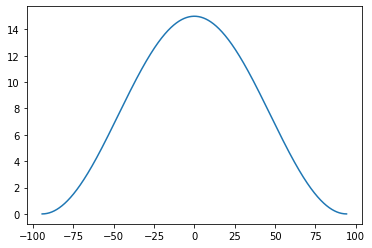

In [5]:
plt.plot(x,h)

Text(0, 0.5, 'G^2')

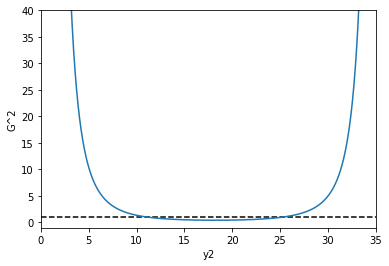

In [21]:
#G^2=1 at the crest of the bump (x=0) use this to solve for an initial condition
y1 = np.linspace(1,40,len(h))
Gcontrol = [(q1**2)/(g_*(Y-hm-y)**3) + (q2**2)/(g_*y**3) for y in y1]

plt.plot([0,35],[1,1], linestyle='--', c='k')
plt.plot(y1, Gcontrol)
plt.ylim(-1,40)
plt.xlim(0,35)
plt.xlabel('y2')
plt.ylabel('G^2')

In [22]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

Ga = find_nearest(Gcontrol,1)
Gb = find_nearest(np.delete(Gcontrol,Ga),1)

#want to just take the G from the later index as that is the one passing from subcritial to supercritial
y1BD = y1[max(Ga,Gb)]
print(y1BD)

25.219


In [23]:
print(y1[Gb])

11.218


In [24]:
#with y1 can calculate eta at the centre
etaBD = 1-(y1BD/Y)-r
etaBD

0.00935797665369642

In [25]:
#'hopital's rule at the crest
F1sq = (q1**2)/(g_*y1BD**3)
F2sq = (q2**2)/(g_*(Y-hm-y1BD)**3)
deriv = ((-2*hm*Y)/(L**2))*math.cos(0) #X = 0 in the centre

eta_XBD = math.sqrt((-F2sq*deriv)/(3*(F2sq/(r-etaBD-hm/Y)-F1sq/(1-r-etaBD))))
eta_XBD = eta_XBD*-1 #in regime 2 will be decreasing in height at the crest
print(eta_XBD)

-0.17153779155728824


In [27]:
F2sq

0.9237909723928923

In [15]:
eta_X =  np.zeros(len(x))
eta_X[500] = eta_XBD

In [28]:
eta = np.zeros(len(x))
y2 = np.zeros(len(x))
y1 = np.zeros(len(x))
eta[500] = etaBD
q = q1
step = (x[1]-x[0])/Y

for i in range(500):
    #forward difference
    eta[500+i+1]= eta[500+i]+eta_X[500+i]*step
    y2[500+i+1] = Y*(eta[500+i+1]-(h[500+i+1]/Y)+r)
    y1[500+i+1] = Y*(1-r-eta[500+i+1])
    eta_X[500+i+1] = (q**2)/(g_*y2[500+i+1]**3) * 1/(1-((q**2)/(g_*(y1[500+i+1]**3)))-((q**2)/(g_*(y2[500+i+1]**3)))) * (hm/L)*math.sin((2*x[500+i+1])/L)
    
    #backwards difference
    eta[500-i-1]= eta[500-i]+eta_X[500-i]*(-step)
    y2[500-i-1] = Y*(eta[500-i-1]-(h[500-i-1]/Y)+r)
    y1[500-i-1] = Y*(1-r-eta[500-i-1])
    eta_X[500-i-1] = (q**2)/(g_*y2[500-i-1]**3) * 1/(1-((q**2)/(g_*(y1[500-i-1]**3)))-((q**2)/(g_*(y2[500-i-1]**3)))) * (hm/(L))*math.sin((2*x[500-i-1])/L)

In [29]:
interface = [h[i]+Y*(eta[i]-(h[i]/Y)+r) for i in range(len(x))]

Text(0.5, 0, 'Distance from centre of bump [cm]')

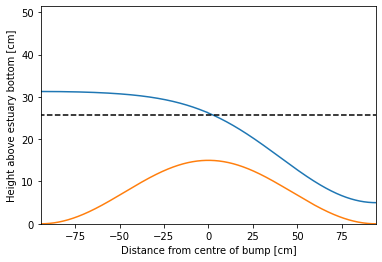

In [30]:
plt.plot(x,interface, label='Interface')
plt.plot(x,h)
plt.plot([-100,100],[Y/2,Y/2], c='k', linestyle='--')
plt.ylim([0,51.4])
plt.xlim([-L*(math.pi/2),L*(math.pi/2)])
plt.ylabel('Height above estuary bottom [cm]')
plt.xlabel('Distance from centre of bump [cm]')

### Composite Froude number

In [31]:
F1sq = [(q**2)/(g_*(y1[i]**3)) for i in range(len(eta))]
F2sq = [(q**2)/(g_*(y2[i]**3)) for i in range(len(eta))]

G = [(F1sq[i]+F2sq[i]) for i in range(len(eta))]

<ipython-input-31-538bd8d43d2f>:1: RuntimeWarning: divide by zero encountered in double_scalars
  F1sq = [(q**2)/(g_*(y1[i]**3)) for i in range(len(eta))]
<ipython-input-31-538bd8d43d2f>:2: RuntimeWarning: divide by zero encountered in double_scalars
  F2sq = [(q**2)/(g_*(y2[i]**3)) for i in range(len(eta))]


Text(0.5, 0, 'Distance from centre of bump [cm]')

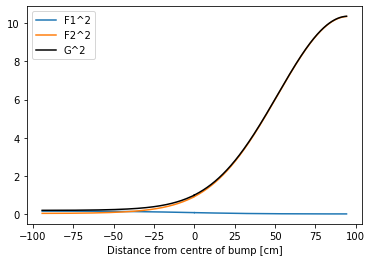

In [35]:
plt.plot(x,F1sq, label = 'F1^2')
plt.plot(x,F2sq, label = 'F2^2')
plt.plot(x,G, label = 'G^2', c='k')
plt.legend()
plt.xlabel('Distance from centre of bump [cm]')

### Velocity

In [36]:
U1 = [q/y1[i] for i in range(len(y1))]
U2 = [q/y2[i] for i in range(len(y1))]

<ipython-input-36-3ee94f15d3cd>:1: RuntimeWarning: divide by zero encountered in double_scalars
  U1 = [q/y1[i] for i in range(len(y1))]
<ipython-input-36-3ee94f15d3cd>:2: RuntimeWarning: divide by zero encountered in double_scalars
  U2 = [q/y2[i] for i in range(len(y1))]


Text(0, 0.5, 'Velocity [cm/s]')

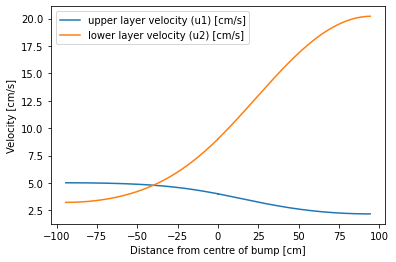

In [37]:
plt.plot(x,U1,label='upper layer velocity (u1) [cm/s]')
plt.plot(x,U2,label='lower layer velocity (u2) [cm/s]')
plt.legend()
plt.xlabel('Distance from centre of bump [cm]')
plt.ylabel('Velocity [cm/s]')

### question 4

In [39]:
deltaU = [((U1[i]-U2[i])**2)/g_ for i in range(len(U1))]

<ipython-input-39-96a9034f39ed>:1: RuntimeWarning: invalid value encountered in double_scalars
  deltaU = [((U1[i]-U2[i])**2)/g_ for i in range(len(U1))]


Text(0, 0.5, '(u1-u2)^2/g')

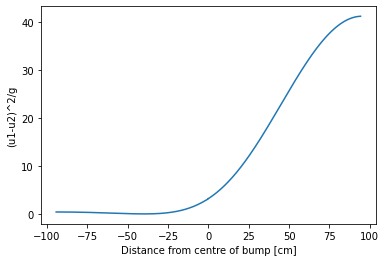

In [40]:
plt.plot(x,deltaU)
plt.xlabel('Distance from centre of bump [cm]')
plt.ylabel('(u1-u2)^2/g')